In [1]:
import json
from knnredo import get_top_similar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
ruta='pisos_limpios.csv'
df = pd.read_csv(ruta,sep=',')
df.set_index('uv', inplace=True)
df=df[df.precio>0]
df.precio_area=(df.precio_area/10**4).round(0)
with open('./perfiles/perfil1.json') as archivo:
            opciones = json.load(archivo)

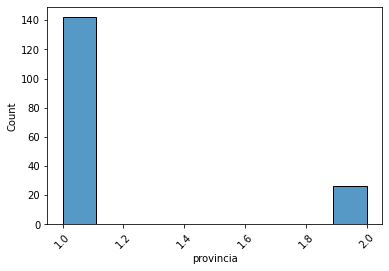

In [3]:
g= sns.histplot(df.provincia);
plt.xticks(rotation=45);

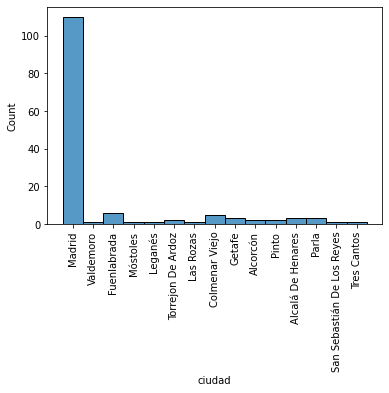

In [4]:
g= sns.histplot(df.ciudad[df.provincia==1]);
plt.xticks(rotation=90);

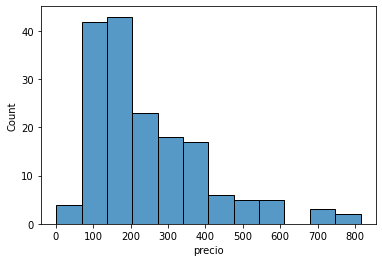

In [5]:
sns.histplot(df.precio);

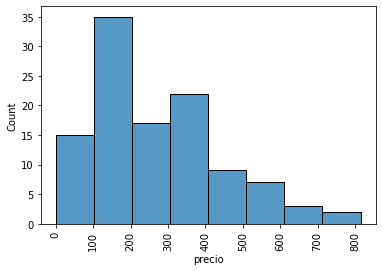

In [6]:
g= sns.histplot(df.precio[df.ciudad =='Madrid']);
plt.xticks(rotation=90);

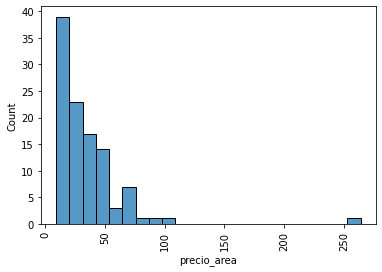

In [7]:
g= sns.histplot(df.precio_area[df.ciudad =='Madrid']);
plt.xticks(rotation=90);

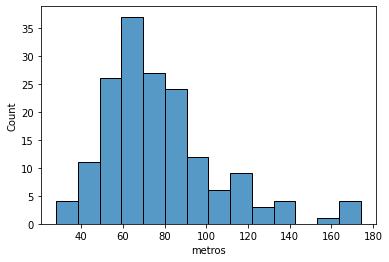

In [8]:
sns.histplot(df.metros);

/home/emilio/anaconda3/envs/clik/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


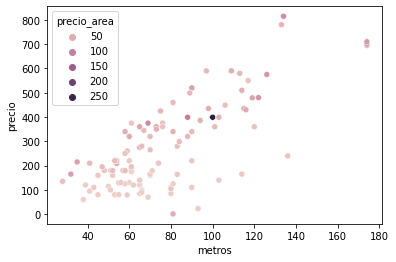

In [9]:
###################################################################
#Nos quedamoscon Madrid
###################################################################
df = df[df.ciudad =='Madrid']
sns.scatterplot(df[df.provincia ==1].metros, df[df.provincia ==1].precio,hue=(df[df.provincia ==1].precio_area));

/home/emilio/anaconda3/envs/clik/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


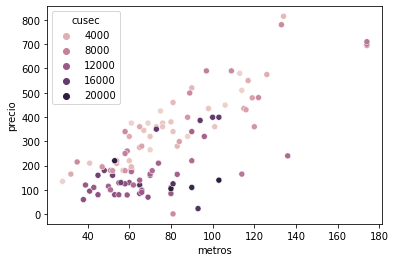

In [10]:
sns.scatterplot(df[df.ciudad=='Madrid'].metros, df[df.ciudad=='Madrid'].precio,hue=df[df.ciudad=='Madrid'].cusec);

/home/emilio/anaconda3/envs/clik/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


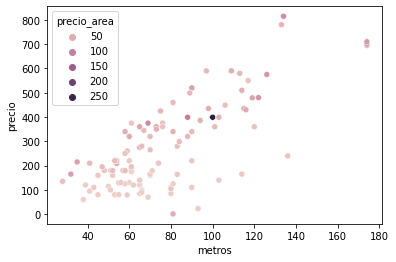

In [11]:
sns.scatterplot(df.metros, df.precio, hue=df.precio_area);

In [12]:
columnas = ['planta','ascensor','precio', "precio_area"]
n_targets = 3
k = 3

dfs=[]
#comentario
for i in range(n_targets):

    target = df.sample(1)
    df_test = df.copy()
    df_test.drop(target.index, axis=0, inplace=True)
 
    # get top similar
    similar_df = get_top_similar(df_test,target, opciones, k)

    # etiquetar target
    target['is_target'] = 1
    similar_df['is_target'] = 0
        
    # contains 4 houses with 3 cols: columns and is_target
    df_all = pd.concat([target, similar_df])[list(target.columns)]
    # give color
    df_all['group'] = i

    dfs.append(df_all)

df_groups = pd.concat(dfs)

/home/emilio/anaconda3/envs/clik/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


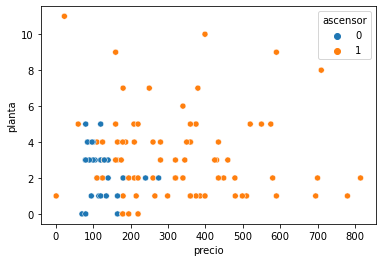

In [13]:
sns.scatterplot(df.precio, df.planta,hue=df.ascensor);

/home/emilio/anaconda3/envs/clik/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


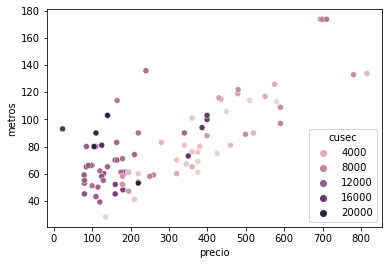

In [14]:
sns.scatterplot(df[df.intext==3].precio, df[df.intext==3].metros,hue=df.cusec);

In [15]:
def row_style(row):
    if row.is_target == 1:
        return pd.Series('background-color: green', row.index)
    elif row.is_target == 0:
        return pd.Series('background-color: blue', row.index)
    else:
        return pd.Series('', row.index)

def pinta_filas(df):
    df.reset_index(inplace=True)
    df =df.style.apply(row_style, axis=1)
    return df


In [16]:
df_groups=df_groups[columnas + ['is_target'] + ['group']]
df_groups
#pinta_filas(df_groups)


,planta,ascensor,precio,precio_area,is_target,group
uv,,,,,,
UV/2020/000177,5,1,375.0,21.0,1,0
UV/2020/000149,5,1,375.0,90.0,0,0
UV/2020/000310,5,1,209.0,53.0,0,0
UV/2020/000307,3,1,320.0,34.0,0,0
UV/2020/000259,2,1,479.0,59.0,1,1
UV/2021/000373,1,1,299.0,31.0,0,1
UV/2021/000405,2,1,340.0,34.0,0,1
UV/2020/000189,3,1,460.0,34.0,0,1
UV/2021/000389,2,1,320.0,NaN,1,2


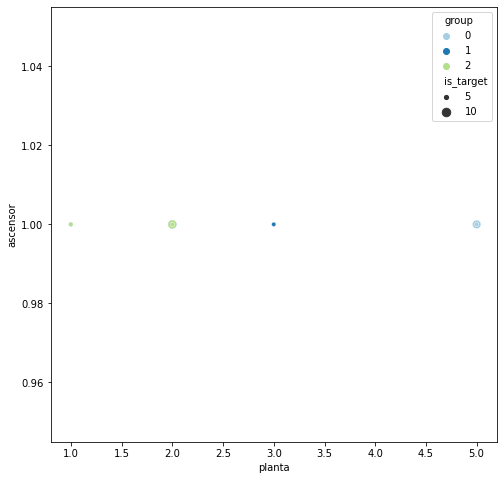

In [17]:
colores=['r','g','y','b','c']
fig=plt.gcf()
fig.set_size_inches(8,8)

def jitter(values):
    return values * np.random.normal(1,0,values.shape)

sns.scatterplot(x=jitter(df_groups[columnas[0]]), y=jitter(df_groups[columnas[1]]), size=5+5*df_groups.is_target, hue=df_groups.group, palette='Paired');



<AxesSubplot:xlabel='precio', ylabel='precio_area'>

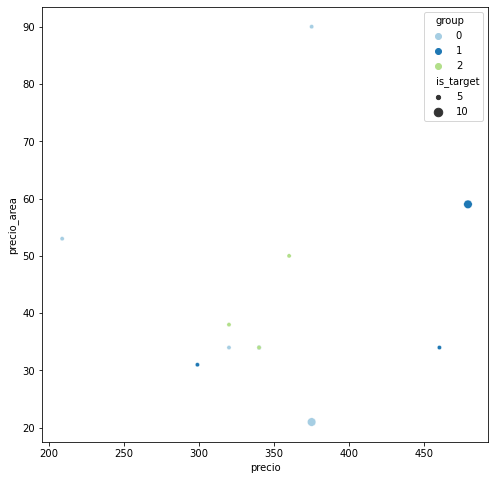

In [18]:
fig=plt.gcf()
fig.set_size_inches(8,8)
sns.scatterplot(x=jitter(df_groups[columnas[2]]), y=jitter(df_groups[columnas[3]]), size=5+5*df_groups.is_target, hue=df_groups.group, palette='Paired')



/home/emilio/anaconda3/envs/clik/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/emilio/anaconda3/envs/clik/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/emilio/anaconda3/envs/clik/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


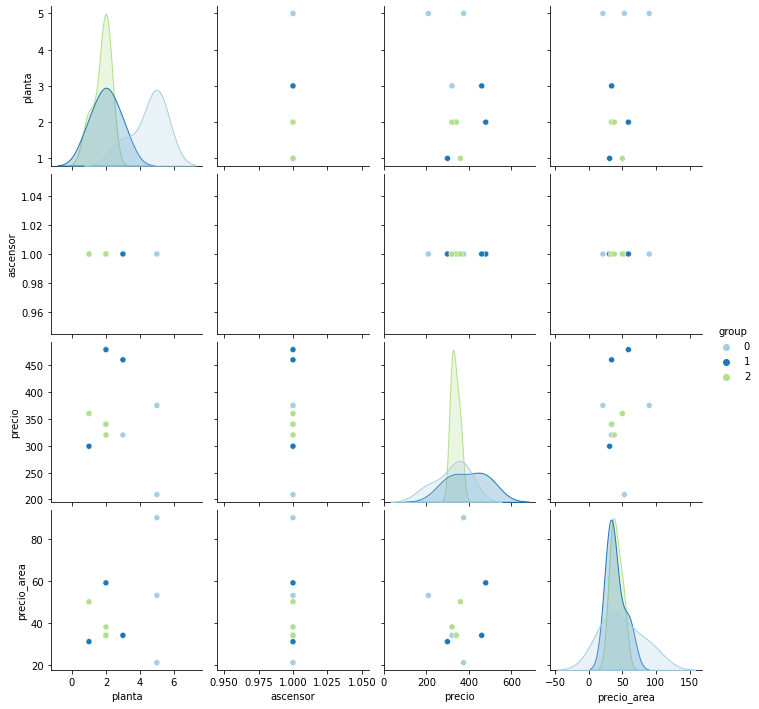

In [19]:
sns.pairplot(df_groups[columnas + ["group"]], hue="group", palette='Paired');